In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Dataviz classification")

In [3]:
import pandas as pd
import numpy as np 
import itertools
import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
from keras.models import model_from_json

Using TensorFlow backend.


In [4]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc']) 





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.










In [0]:
# classify a single image
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(224, 224))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [6]:
vgg16 = applications.VGG16(include_top=False, weights='imagenet')

In [0]:
def test_single_image(path, model):
    model = loaded_model
    tags = ['bar', 'info', 'line', 'map', 'other', 'scatter']
    images = read_image(path)
    bt_prediction = vgg16.predict(images) 
    preds = model.predict_proba(bt_prediction)
    results = list(np.round(preds[0] * 100, 2))
    print("prediction: ", tags[results.index(max(results))])
    return load_img(path)

[INFO] loading and preprocessing image...
prediction:  bar


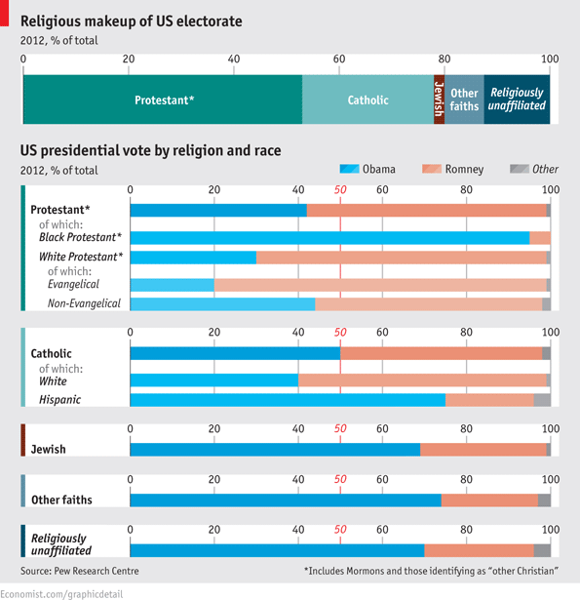

In [8]:
test_single_image("training/bar/economist_daily_chart_2.png", loaded_model)